#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### loading data

In [2]:
data=pd.read_csv("C:\\Users\\punith yc\\Downloads\\Fraud.csv")

#### first 5 rows of a dataset

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### last 5 rows of a datset

In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
data.shape

(6362620, 11)

#### dataset informations

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### checking the number of missing values in a column

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### checking for the duplicates

In [8]:
data.duplicated().sum()

0

In [9]:
data.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: >

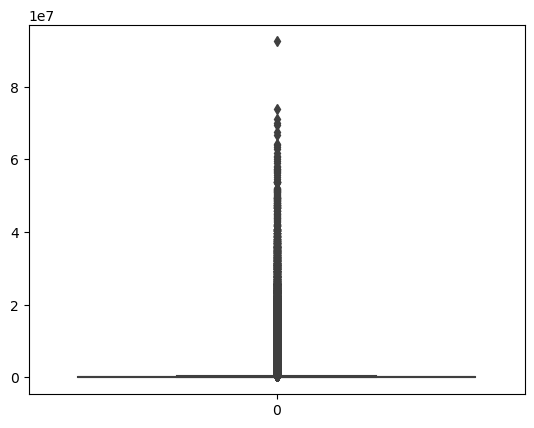

In [11]:
sns.boxplot(data['amount'])

<Axes: >

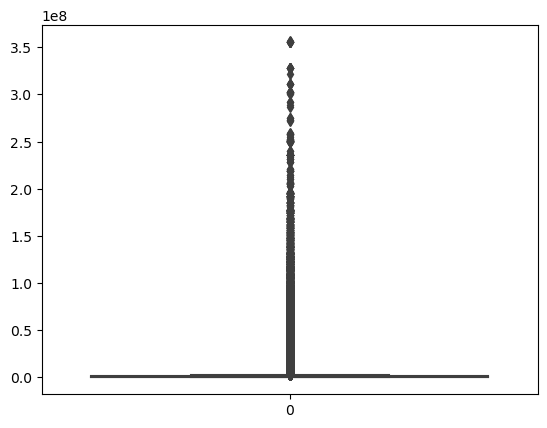

In [12]:
sns.boxplot(data['newbalanceDest'])

<Axes: >

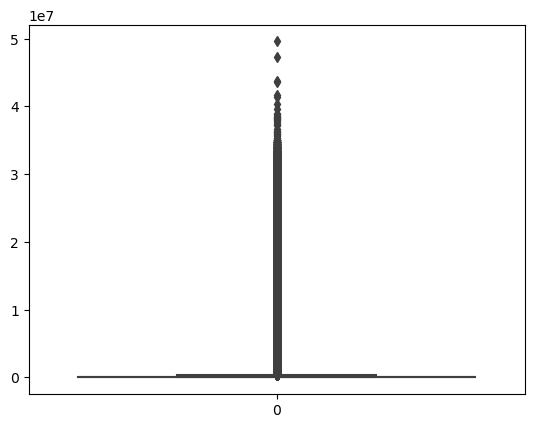

In [13]:
sns.boxplot(data['newbalanceOrig'])

<Axes: >

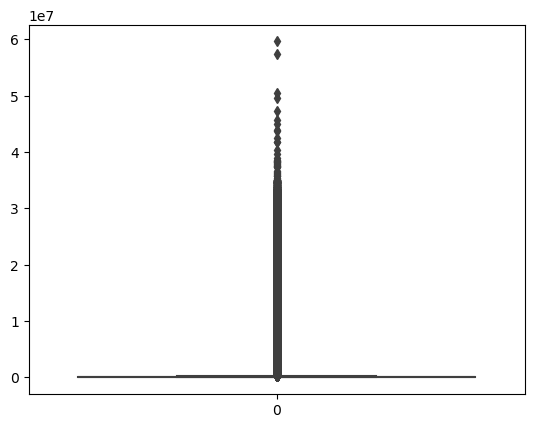

In [14]:
sns.boxplot(data['oldbalanceOrg'])

<Axes: >

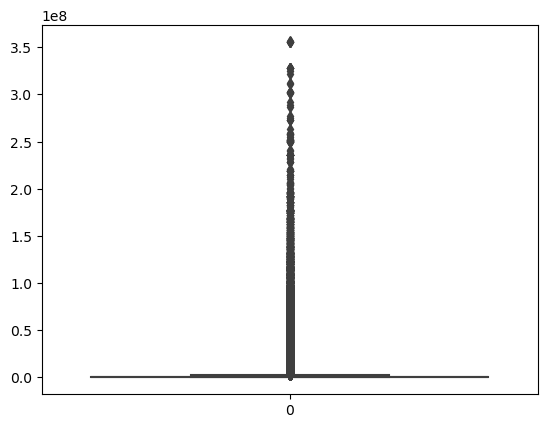

In [15]:
sns.boxplot(data['oldbalanceDest'])

#### handling outliers

In [16]:
def outliers(a):
    sorted(a)
    q1=np.percentile(a,25)
    q3=np.percentile(a,75)
    iqr=q3-q1
    max_limit=q3+(1.5*iqr)
    min_limit=(q1-1.5*iqr)
    a=np.where(a<min_limit,q1,a)
    a=np.where(a>max_limit,q3,a)
    return a

In [17]:
data['amount']=outliers(data['amount'])
data['newbalanceDest']=outliers(data['newbalanceDest'])
data['newbalanceOrig']=outliers(data['newbalanceOrig'])
data['oldbalanceDest']=outliers(data['oldbalanceDest'])
data['oldbalanceOrg']=outliers(data['oldbalanceOrg'])

#### dropping Features that do not contain useful information for predicting the target variable  model

In [18]:
data.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [19]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

#### encoding categorical varibles to continious variables

In [20]:
from sklearn.preprocessing import LabelEncoder
LE_obj=LabelEncoder()
data['type']=LE_obj.fit_transform(data['type'])

#### splitting data into train and test 

In [53]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,train_size=0.8)

In [54]:
x_train=train.drop('isFraud',axis=1)
y_train=train['isFraud']
x_test=test.drop('isFraud',axis=1)
y_test=test['isFraud']

In [23]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

5090096
5090096
1272524
1272524


#### model training

In [24]:
from sklearn.linear_model import LogisticRegression

log_obj=LogisticRegression()
log_obj.fit(x_train,y_train)
train_predict=log_obj.predict(x_train)


In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
accuracy=accuracy_score(train_predict,y_train)
print(f"train accuracy score is {accuracy}")


train accuracy score is 0.9984613256803015


#### model evaluation

In [26]:
log_obj.fit(x_test,y_test)
test_predict=log_obj.predict(x_test)

In [27]:
test_accuracy=accuracy_score(test_predict,y_test)
print(confusion_matrix(test_predict,y_test))
print(f"test accuracy score is {test_accuracy}")
print(f"precision is {precision_score(test_predict,y_test)}")
print(f"recall is {recall_score(test_predict,y_test)}")

[[1270581    1604]
 [    317      22]]
test accuracy score is 0.9984904017527371
precision is 0.013530135301353014
recall is 0.06489675516224189


#### from the above model we can see that the accuracy is 99 for both train and test data which is not good this is due to the dataset is having 2 classes one is fraud and another one is normal transaction and out of the total data points more than 98% of data points are normal transactions so if we train our machine learning model with this type if dataset it can't recognise the fradulent transactions and when we test for the new data point  it will predict all the transactions as normal transcations which is not the correct prediction and in this type of dataset we mostly focuses on precision and recall so if we get a good precision and recall score then the model is predicting correct

#### using random forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
class_obj=RandomForestClassifier()
class_obj.fit(x_train,y_train)
train_predict=class_obj.predict(x_train)

In [56]:
train_accuracy=accuracy_score(train_predict,y_train)
print(confusion_matrix(train_predict,y_train))
print(f"test accuracy score is {train_accuracy}")
print(f"precision is {precision_score(train_predict,y_train)}")
print(f"recall is {recall_score(train_predict,y_train)}")

[[5083526      25]
 [      6    6539]]
test accuracy score is 0.9999939097415844
precision is 0.9961913467397928
recall is 0.999083269671505


#### when compared to logistic regression the random forest is good for this imbalnaced data with a good precision and recall and here we can see that false positives and false negatives are reduced and which may be a good model for this type of dataset

In [28]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

#### To handle this imbalanced data we use under sampling to build a sample dataset containing similar distribution of normal and fraud transactions

#### under sampling

In [29]:
normal=data[data.isFraud==0]
fraud=data[data['isFraud']==1]

In [30]:
print(normal.shape)
print(fraud.shape)

(6354407, 9)
(8213, 9)


In [31]:
normal_sample=normal.sample(n=8213,replace=False)

In [32]:
print(normal_sample.shape)
print(fraud.shape)

(8213, 9)
(8213, 9)


#### concatenating the 2 samples by index(row-wise)

In [33]:
new_data=pd.concat([normal_sample,fraud],axis=0)

In [34]:
new_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6058742,500,0,248142.78,107315.175,144258.41,400741.12,152598.35,0,0
4734419,332,3,8210.39,10135.000,1924.61,0.00,0.00,0,0
4243568,306,3,41295.51,0.000,0.00,0.00,0.00,0,0
1396637,139,1,104063.62,10042.000,0.00,721916.65,825980.27,0,0
3093306,235,3,13553.45,45520.000,31966.55,0.00,0.00,0,0


In [35]:
new_data['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [36]:
new_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6058742,500,0,248142.78,107315.175,144258.41,400741.12,152598.35,0,0
4734419,332,3,8210.39,10135.000,1924.61,0.00,0.00,0,0
4243568,306,3,41295.51,0.000,0.00,0.00,0.00,0,0
1396637,139,1,104063.62,10042.000,0.00,721916.65,825980.27,0,0
3093306,235,3,13553.45,45520.000,31966.55,0.00,0.00,0,0


In [37]:
train,test=train_test_split(new_data,train_size=0.8)

In [38]:
print(len(train))
print(len(test))

13140
3286


In [39]:
x_train=train.drop('isFraud',axis=1)
y_train=train['isFraud']
x_test=test.drop('isFraud',axis=1)
y_test=test['isFraud']

#### using logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
log_obj=LogisticRegression()
log_obj.fit(x_train,y_train)
train_predict=log_obj.predict(x_train)


In [41]:
train_accuracy=accuracy_score(train_predict,y_train)
print(confusion_matrix(train_predict,y_train))
print(f"train accuracy score is {train_accuracy}")
print(f"precision is {precision_score(train_predict,y_train)}")
print(f"recall is {recall_score(train_predict,y_train)}")

[[5764  472]
 [ 772 6132]]
train accuracy score is 0.9053272450532724
precision is 0.9285281647486372
recall is 0.8881807647740441


In [42]:
log_obj.fit(x_test,y_test)
test_predict=log_obj.predict(x_test)

In [43]:
test_accuracy=accuracy_score(test_predict,y_test)
print(confusion_matrix(test_predict,y_test))
print(f"test accuracy score is {test_accuracy}")
print(f"precision is {precision_score(test_predict,y_test)}")
print(f"recall is {recall_score(test_predict,y_test)}")

[[1470  116]
 [ 207 1493]]
test accuracy score is 0.9017041996348144
precision is 0.927905531385954
recall is 0.8782352941176471


#### using random forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
class_obj=RandomForestClassifier()
class_obj.fit(x_train,y_train)
train_predict=class_obj.predict(x_train)

In [45]:
train_accuracy=accuracy_score(train_predict,y_train)
print(confusion_matrix(train_predict,y_train))
print(f"test accuracy score is {train_accuracy}")
print(f"precision is {precision_score(train_predict,y_train)}")
print(f"recall is {recall_score(train_predict,y_train)}")

[[6535    0]
 [   1 6604]]
test accuracy score is 0.999923896499239
precision is 1.0
recall is 0.9998485995457986


In [46]:
class_obj.fit(x_test,y_test)
test_predict=class_obj.predict(x_test)

In [47]:
test_accuracy=accuracy_score(test_predict,y_test)
print(confusion_matrix(test_predict,y_test))
print(f"test accuracy score is {test_accuracy}")
print(f"precision is {precision_score(test_predict,y_test)}")
print(f"recall is {recall_score(test_predict,y_test)}")

[[1677    0]
 [   0 1609]]
test accuracy score is 1.0
precision is 1.0
recall is 1.0


#### from the above models the accuracy is good for the imbalanced data but random under sampling is not agood approach for this type of dataset while sampling there may be significant loss in the data 

In [ ]:
# 1. Data cleaning including missing values, outliers and multi-collinearity.

# first we need to calculate the percentage the null values and this can be handled in 3 scenarios
# i.if the percentage the null values in the dataset is high then we can ignore or delete the column
# ii.if the percentage of null values is intermediate then we imputation method and the imputation can be done by mean
#    or median for the continious data. if there is no outliers then we will replace it with mean and if there is outliers then
#    we will replace with median and mode for the categorical data.
# iii.if the percentage of null values is low then we will remove the rows which are having nulls 

# outliers:
# Before handling outliers, visualized the data using box plots, 
# outliers are handled by using IQR (Interquartile Range) Method:
# Identified outliers based on the interquartile range. Values outside a specified range (commonly 1.5 times the IQR) are treated as outliers.

In [57]:
# 2. Describe your fraud detection model in elaboration. 

# objective: the objective of this fraud detection model,is to identify whether the transaction is legit or fraudulent transactions
# the data used for training and testing the model. This data includes transaction data,type of transaction and whether its fraud or not
# while building this model i applied a some of preprocessing steps such as handling missing values,encoding categorical variables,and handling outliers.
# this model is build by using classification model such as logistic regression and random forest with the help of ensemble techniques 
# as this dataset is highly imbalnced i performed random under sampling and applied a classification algorithims on top of that
# and used classification metrics such as accuracy,precision and recall score to evaluate the performance of the model to identify whether the model is good or not


In [ ]:
# 3.How did you select variables to be included in the model

#here the main of the model is to predict whether the transaction is fraud or not and to idenify the variables i conducted some of 
#the exploratory data analysis to gain konwledge of the data and some of the summary statistics and performedd correlation to identify the 
#relationship between the variables and this helped in finding there is mutlicollinearity or not with the target variable and dropped some 
#of the variables which are not used in training the model
#used scikit-learn machine learning library which is used for implentinging a machine learning model

In [ ]:
# 4.Demonstrate the performance of the model by using best set of tools. 

#Used Jupyter Notebook to show the code and analysis.and it also helps presenting the steps involved in building, training,
#and evaluating the fraud detection model.Used python libraries such as numpy and pandas for manipulating and array operations
#and matplotlib and seaborn for visualizing the data

In [ ]:
# 5.What are the key factors that predict fraudulent customer? 
# more number of transactions within a short period of time might with different type of payment methods can leads to a fradulent behaviour
# transactions conducted at late nights or non business times can lead to a fradulent behaviours
# multiple failed attempts such as entering wrong password or pins etc...

In [ ]:
# 6. What kind of prevention should be adopted while company update its infrastructure?
# implementing multi factor authentication for users and using encryption techniques to protect sensitive data
# provoding awareness regularly how to handle this situations etc..

In [ ]:
# 7.